# Korrelation zwischen Wetterdaten und Fahrradzählungen

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

df_training = pd.read_csv('training_data_integrated.csv', index_col='Datetime', parse_dates=True)

In [2]:
#Wetterdaten bereinigen
df_training['Temperature (°C)'] = np.where((df_training['Temperature (°C)'] < -20.0) | (df_training['Temperature (°C)'] > 45.0), np.nan, df_training['Temperature (°C)'])
df_training['Temperature (°C)'].fillna(df_training['Temperature (°C)'].mean(), inplace=True)
df_training['Precipitations (mm)'] = np.where((df_training['Precipitations (mm)'] < 0.0) | (df_training['Precipitations (mm)']) > 850.0, np.nan, df_training['Precipitations (mm)'])
df_training['Precipitations (mm)'].fillna(df_training['Precipitations (mm)'].mean(), inplace=True)
df_training['Wind Speed (m/s)'] = np.where((df_training['Wind Speed (m/s)'] < 0.0) | (df_training['Wind Speed (m/s)'] > 30.0), np.nan, df_training['Wind Speed (m/s)'])
df_training['Wind Speed (m/s)'].fillna(df_training['Wind Speed (m/s)'].mean(), inplace=True)

In [4]:
df_training

,Temperature (°C),Precipitations (mm),Wind Speed (m/s),KennedyBrücke,NordBrücke,SüdBrücke,Estermannufer,VonSandtUfer,Rhenusallee,BrühlerStraße,WilhelmSpiritusUfer,McCloyWeg,WegDammBonnBeuel,Bonn
Datetime,,,,,,,,,,,,,,
2016-01-01 00:00:00,4.7,0.0,2.7,48.0,2.0,27.0,0.0,0.0,2.0,1.0,0.0,0.0,0.0,93.0
2016-01-01 01:00:00,4.3,0.2,3.7,78.0,15.0,14.0,2.0,13.0,11.0,1.0,0.0,0.0,0.0,143.0
2016-01-01 02:00:00,4.7,0.3,3.2,91.0,6.0,27.0,0.0,0.0,14.0,11.0,0.0,0.0,0.0,168.0
2016-01-01 03:00:00,4.6,0.0,3.3,103.0,3.0,9.0,4.0,1.0,4.0,8.0,0.0,0.0,0.0,139.0
2016-01-01 04:00:00,5.0,0.0,4.9,50.0,9.0,14.0,0.0,0.0,2.0,2.0,0.0,0.0,0.0,83.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-12-31 19:00:00,13.4,0.0,5.0,197.0,10.0,45.0,11.0,13.0,27.0,11.0,17.0,10.0,34.0,375.0
2021-12-31 20:00:00,13.1,0.0,4.2,55.0,12.0,17.0,5.0,10.0,10.0,5.0,9.0,30.0,12.0,165.0
2021-12-31 21:00:00,13.0,0.6,3.9,71.0,4.0,9.0,2.0,10.0,11.0,14.0,11.0,18.0,16.0,166.0


In [5]:
#Korrelationsmatrix
corr_matrix = df_training[['Bonn', 'Temperature (°C)', 'Precipitations (mm)', 'Wind Speed (m/s)']].corr()
corr_matrix

,Bonn,Temperature (°C),Precipitations (mm),Wind Speed (m/s)
Bonn,1.000000,0.520376,-0.002827,0.016775
Temperature (°C),0.520376,1.000000,-0.000083,-0.053783
Precipitations (mm),-0.002827,-0.000083,1.000000,0.001102
Wind Speed (m/s),0.016775,-0.053783,0.001102,1.000000


#### Erste Beobachtung: 
Die Wetterbedingungen korrelieren untereinander scheinbar nur insofern, dass Wind und Temperatur sich ganz leicht bedingen (0.18), die anderen Korrelationskoeffizienten liegen nahe bei 0, es besteht also kein linarer Zusammenhang. 
Auf die Fahrradzählungen hat scheinbar nur die Temperatur überhaupt einen Einfluss. Bei wärmeren Temperaturen sind mehr Fahrräder unterwegs. Ein Korrelationskoeffizient von 0.52 weist auf einen mäßigen linearen Zusammenhang hin.

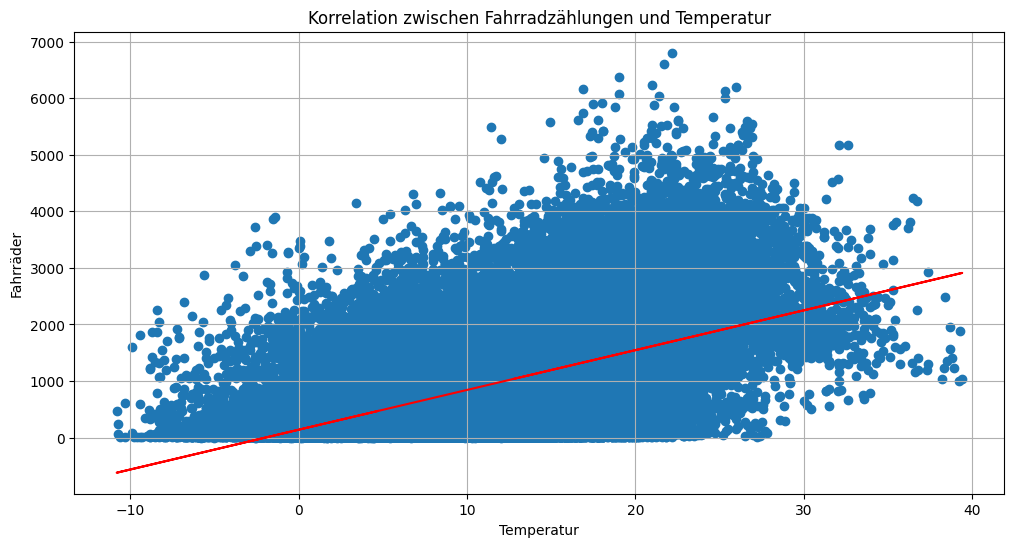

In [12]:
x = df_training['Temperature (°C)']
y = df_training['Bonn']

slope, intercept = np.polyfit(x, y, 1)

plt.figure(figsize=(12,6))
plt.scatter(x, y)
plt.plot(x, slope*x + intercept, color='red')
plt.title('Korrelation zwischen Fahrradzählungen und Temperatur')
plt.xlabel('Temperatur')
plt.ylabel('Fahrräder')
plt.grid()
plt.show()